<h1 align="center"><font color="#5831bc" face="Comic Sans MS">An Insightful Story About Successful Crowdfunding Projects</font></h1> 
<br>

***Crowdfunding*** is the practice of funding a project or a venture by raising monetary contributions from many people across the globe. There are a number of organisations such as DonorsChoose.org, Patreon, Kickstarter which hosts the crowdfunding projects on their platforms. Kickstarter has hosted more than 250,000 projects on their website with more than $4 Billion collective amount raised.  
<br>

![](https://people.safecreative.org/viewimage/viewmagazine?path=kickstarter-patreon.jpg&defaultPath=)

<br>
While it is true that crowdfunding is one of the most popular methods to to raise funds however the reality is that **not every project is able to completely reach the goal**. Infact, on KickStarter, only about 35 percent of the total projects have raised successful fundings in the past. This fact raises an important question - **which projects are able to successfully achieve their goal?**. In other words, can project owners somehow know what are the key project characteristics that increases the chances of success. 

In many studies, Researchers and analysts have used the descriptive analysis methods on the crowdfunding data to obtain insights related to project success. While many others have also applied predictive modelling to obtain the probability of project success. However, these approaches have the fundamental problems: 

- Descriptive analysis - only gives surface level insights    
- Predictive analysis - models act as the blackboxes    

### About this Kernel  
In this kernel, I have shared a hybrid analysis approach that uses the concepts of both types of analysis enriched with the concepts of **machine learning explainability** which can be used to answer the key questions related to the success (or failure) of any crowdfunding project. The framework uses the interpretations derived from a trained machine learning model. Unlike descriptive analysis to find key insights, the focus in this approach is to make use of model behaviours and characteristics such as : Relative Feature Importances, Partial Dependencies, Permutation Importances, SHAP values. I have explained the intuition behind every approach in layman terms. Following are the contents of the kernel: 

## <font color="#5831bc" face="Comic Sans MS">Contents</font> 

1. <a href="#1">Business Use-Case and Problem Statement</a>    
2. <a href="#2">Hypothesis Generation</a>    
3. <a href="#3">Dataset Preparation</a>     
4. <a href="#4">Modelling the Project Success</a>       
5. <a href="#5">Model Interpretation : Insights Generation</a>    
    <a href="#5-1">5.1 Which are the most important features (relatively) of a project? ( **Relative Feature Importance** )</a>     
    <a href="#5-2">5.2 Which features have the biggest impact on the project success? ( **Permutation Importance** )</a>     
    <a href="#5-3">5.3 How does changes in those features affact the project success? ( **Partial Dependencies** )</a>     
    <a href="#5-4">5.4 Digging deeper into the decisions made by the model ( **SHAP values** )</a>    
6. <a href="#6">Final Conclusions</a>       
  
<div id="1"></div>
<h2><font color="#5831bc" face="Comic Sans MS">1. Understanding the Business Use Case</font>   </h2><br>
The essential business use-cases in the crowdfunding scenario can be considered from two different perspectives - from the project owner's perspective and the companies perspective. 

1. From the **project owner's perspective**, it is highly beneficial to be aware about the key characteristics of a project that greatly influence the success of any project. For instance, it will be interesting to pre-emptively know about following questions:   

     - What is an ideal and optimal range of the funding goal for my project ?  
     - On which day of the week, I should post the project on Kickstarter ?  
     - How many keywords should I use in my project title ?  
     - What should be the total length of my project description ?     


2. From the **perspective of companies** which hosts the crowdfunding projects such as DonorsChoose.org, Patreon, and Kickstarter, they receive hundreds of thousands of project proposals every year. A large amount of manual effort is required to screen the project before it is approved to be hosted on the platform. This creates the challenges related to scalability, consistency of project vetting across volunteers, and identification of projects which require special assistance. 

It is due to these two perspectives, there is a need to dig deeper and find more intutive insights related to the projects success. Using these insights, more people can get their projects funded more quickly, and with less cost to the hosting companies. This also allows the hosting companies to optimize the processes and channel even more funding directly to projects.   

<div id="2"></div>
<h2><font color="#5831bc" face="Comic Sans MS">2. Hypothesis Generation </font>   </h2> <br>
Hypothesis Generation is very powerful technique which can help an analyst to structure a very insightful and a relevant solution of a business problem. It is a process of building an intuitive approach of the business problem without even thinking about the available data. Whenever I start with any new business problem, I try to make a comprehensive list of all the factors which can be used to obtain the final output. For example, which features should affect my predictions. Or, which values of those features will give me the best possible result. In case of crowdfunding, the question can be - which features are very important to decide if a project will be successful or not.  

So, to generate the hypothesis for the use-case, we will write down a list of factors (without even looking at the available data) that can possibly be important to model the project success.   

1. **Total amount to be raised** - More amount may decrease the chances that the project will be successful.  
2. **Total duration of the project** - It is possible that projects which are active for very short or very long time periods are not successful.  
3. **Theme of the project** - People may consider donating to a project which has a good cause or a good theme.  
4. **Writing style of the project description** - If the message is not very clear, the project may not get complete funding.  
5. **Length of the project description** - Very long piecies of text may not perform good as compared to shorter crisp texts.  
6. **Project launch time** - A project launched on weekdays as compared to weekends or holidays may not get complete funding amount.  

So this is an incomplete list of possible factors we can think at this stage that may influence the project success. Now, using machine learning interpretability, not only we can try to understand which features are actually important but also what are the feature values which these features can take. 

<div id="3"></div>
<h2><font color="#5831bc" face="Comic Sans MS">3. Dataset Preparation </font>   </h2>
<br>Our business use-case is identified, problem statement is formulated, and we have defined a hypothesis. We can now start the analysis, modelling, and interpretting in order to find out the key insights. First, we load the available dataset. 

### <font color="#5831bc" face="Comic Sans MS">3.1 Load Dataset</font> 

In [1]:
## load required libraries 
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from pdpbox import pdp, get_dataset, info_plots
from eli5.sklearn import PermutationImportance
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import FeatureUnion
from collections import Counter
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import warnings
import eli5
warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)

def syllable_count(word):
    word = word.lower()
    vowels = "aeiouy"
    count = 0
    if word[0] in vowels:
        count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            count += 1
    if word.endswith("e"):
        count -= 1
    if count == 0:
        count += 1
    return count

projects = pd.read_csv("../ks-projects-201801.csv", parse_dates = ["launched", "deadline"])

print ("Total Projects: ", projects.shape[0], "\nTotal Features: ", projects.shape[1])
projects.head()

Using TensorFlow backend.


Total Projects:  378661 
Total Features:  15


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


### <font color="#5831bc" face="Comic Sans MS">3.2 Dataset Preprocessing</font>  

In this dataset, we can see that a number of features are about the active stage of the project. This means that a project was launched on a particular date and a partial amount is already raised. The goal of our problem statement is a little bit different, we want to focus on the stage in which the project is not launched yet and identify if it will successful or not. Additinaly, find the most important features (and the feature values) that influence this output. So we perform some pre-processing in this step which includes the following: 

- Get rid of unwanted columns (active stage columns)  
- Feature Engineering (driven from our hypothesis generation)    
- Remove Duplicates  
- Handle Missing Values  
- Encode the Categorical Features  

In [2]:
projects = projects.dropna()
projects = projects[projects["currency"] == "USD"]
projects = projects[projects["state"].isin(["failed", "successful"])]
projects = projects.drop(["backers", "ID", "currency", "country", "pledged", "usd pledged", "usd_pledged_real", "usd_goal_real"], axis = 1)

**<font color="#5831bc" face="Comic Sans MS">Feature Engineering (Driven from Hypothesis Generation)</font>**  

1. **Project Name / Description Features:** From our hypothesis, we suggested that how the project name or description is written may affect the success of the project. So we create some features related to project name. We dont have description of the project in this dataset, so we avoid that. 

  - Number of Words Used   
  - Number of Characters Used   
  - Number of Syllables Used (Difficult Words)  

2. **Project Launched Date Features:** Also, we suggested that the project first launch can affect its success. So we create some date - time related features : 

    - Launched Day, Month, Quarter, Week  
    - Total Duration of the Project  
    - Was project launched on weekday or weekend   
    - Was project launched on a holiday or regular day   
    
3. **Project Category Features**: These are more likely the high level features which provides the idea about the category / sub-category of the project. Also, we add some extra information with category such as the popularity of the category calculated from the total number of projects posted in that category.  

    - Category Count and Sub Category Count : Generally how many projects are posted in those categories. This gives an idea if the project belongs to a more generic category or is more of a rare project  
    - Category / Sub-Category Mean Goal : Generally what is the average goal set in those categories / sub-categories. This gives an idea if the project's goal is much higher or much lower than the standard mean goal of that category.   


In [3]:
## feature engineering
projects["syllable_count"]   = projects["name"].apply(lambda x: syllable_count(x))
projects["launched_month"]   = projects["launched"].dt.month
projects["launched_week"]    = projects["launched"].dt.week
projects["launched_day"]     = projects["launched"].dt.weekday
projects["is_weekend"]       = projects["launched_day"].apply(lambda x: 1 if x > 4 else 0)
projects["num_words"]        = projects["name"].apply(lambda x: len(x.split()))
projects["num_chars"]        = projects["name"].apply(lambda x: len(x.replace(" ","")))
projects["duration"]         = projects["deadline"] - projects["launched"]
projects["duration"]         = projects["duration"].apply(lambda x: int(str(x).split()[0]))
projects["state"]            = projects["state"].apply(lambda x: 1 if x=="successful" else 0)

## label encoding the categorical features
projects = pd.concat([projects, pd.get_dummies(projects["main_category"])], axis = 1)
le = LabelEncoder()
for c in ["category", "main_category"]:
    projects[c] = le.fit_transform(projects[c])

For Category and Main Category, I have used LabelEncoder, Some people may argue that LE may not be a perfect choice for this rather OneHot Encoder should be used. But In our use-case we are just trying to understand the effect of a column as a whole, so we can use label encoder. Now, we can generate the count / aggregation based features for main category and sub category. 

In [4]:
## Generate Count Features related to Category and Main Category
t2 = projects.groupby("main_category").agg({"goal" : "mean", "category" : "sum"})
t1 = projects.groupby("category").agg({"goal" : "mean", "main_category" : "sum"})
t2 = t2.reset_index().rename(columns={"goal" : "mean_main_category_goal", "category" : "main_category_count"})
t1 = t1.reset_index().rename(columns={"goal" : "mean_category_goal", "main_category" : "category_count"})
projects = projects.merge(t1, on = "category")
projects = projects.merge(t2, on = "main_category")

projects["diff_mean_category_goal"] = projects["mean_category_goal"] - projects["goal"]
projects["diff_mean_category_goal"] = projects["mean_main_category_goal"] - projects["goal"]

projects = projects.drop(["launched", "deadline"], axis = 1)
projects[[c for c in projects.columns if c != "name"]].head()

,category,main_category,goal,state,syllable_count,launched_month,launched_week,launched_day,is_weekend,num_words,...,Music,Photography,Publishing,Technology,Theater,mean_category_goal,category_count,mean_main_category_goal,main_category_count,diff_mean_category_goal
0,93,6,30000.0,0,11,9,35,5,1,8,...,0,0,0,0,0,57623.76924,25506,72268.329369,3678111,42268.329369
1,93,6,45000.0,0,4,1,2,5,1,3,...,0,0,0,0,0,57623.76924,25506,72268.329369,3678111,27268.329369
2,93,6,8000.0,1,5,1,4,3,0,4,...,0,0,0,0,0,57623.76924,25506,72268.329369,3678111,64268.329369
3,93,6,60000.0,1,14,1,2,5,1,10,...,0,0,0,0,0,57623.76924,25506,72268.329369,3678111,12268.329369
4,93,6,50000.0,0,8,1,3,5,1,5,...,0,0,0,0,0,57623.76924,25506,72268.329369,3678111,22268.329369


<div id="4"></div>
<h2><font color="#5831bc" face="Comic Sans MS">4. Modelling the Project Success </font>   </h2>

Now, with all those features prepared we are ready to train our model. We will train a single random forest regression model for this task. There are ofcourse many other model's available as well such as lightgbm or xgboost, but in this kernel I am not focussing on evaluation metric rather the inisights from predictive modelling. 

In [5]:
## define predictors and label 
label = projects.state
features = [c for c in projects.columns if c not in ["state", "name"]]

## prepare training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(projects[features], label, test_size = 0.025, random_state = 2)
X_train1, y_train1 = X_train, y_train
X_test1, y_test1 = X_test, y_test

## train a random forest classifier 
model1 = RandomForestClassifier(n_estimators=50, random_state=0).fit(X_train1, y_train1)
y_pred = model1.predict(X_test1)

Now, we have a model which predicts the probability of a given project to be successful or not. In the next section we will interpret the model and its predictions. In other words, we will try to prove or disprove our hypothesis. 

<div id="5"></div>
<h2><font color="#5831bc" face="Comic Sans MS">5. Insights from Predictive Modelling </font>   </h2>

- 5.1 Which are the most important features (relatively) of a project? ( **Relative Feature Importance** )       
- 5.2 Which features have the biggest impact on the project success? ( **Permutation Importance** )      
- 5.3 How does changes in those features affact the project success? ( **Partial Dependencies** )       
- 5.4 Digging deeper into the decisions made by the model ( **SHAP values** )     

<div id="5-1"></div>
<h2><font color="#5831bc" face="Comic Sans MS">5.1 Which are the most important features (relatively) of a project? (Relative Feature Importance)</font>   </h2>  

In tree based models such as random forest, a number of decision tress are trained. During the tree building process, it can be computed how much each feature decreases the weighted impurity (or increases the information gain) in a tree. In random forest, the impurity decrease from each feature is averaged and the features are ranked according to this measure. This is called relative feature importance. The more an attribute is used to make key decisions with decision trees, the higher its relative importance. This indicates that the particular feature is one of the important features required to make accurate predictions. 


In [6]:
feature_importances = pd.DataFrame(model1.feature_importances_, index = X_train.columns, columns=['importance'])
feature_importances = feature_importances.sort_values('importance', ascending=False)

colors = ["gray"] * 9 + ["green"]*6
trace1 = go.Bar(y = [x.title()+"  " for x in feature_importances.index[:15][::-1]], 
                x = feature_importances.importance[:15][::-1], 
                name="feature importance (relative)",
                marker=dict(color=colors, opacity=0.4), orientation = "h")

data = [trace1]

layout = go.Layout(
    margin=dict(l=400), width = 1000,
    xaxis=dict(range=(0.0,0.15)),
    title='Relative Feature Importance (Which Features are important to make predictions ?)',
    barmode='group',
    bargap=0.25
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

from IPython.display import display
from IPython.core.display import HTML

tag = "<div> Most Important (Relative) : "
for feat in feature_importances.index[:10]:
    tag += "<span><font color='green'>" +feat.title().replace("_","")+ "</font> &nbsp;|&nbsp; </span>" 
tag += "<br>Least Important (Relative) : "
for feat in feature_importances.index[-15:]:
    tag += "<span><font color='red'>" +feat.title().replace("_","")+ "</font> &nbsp;|&nbsp; </span>" 
tag += "</div>"
display(HTML(tag))

**Inferences** 
> - From the graph, it is clear that the features which are important to predict the project success are: project goal, length of the project name, launched week, duration, and number of syllables present in the name. While the least important features are are mostly related to the project categories    
> - **What does this mean for the project owner?** For someone who is willing to raise funds, they should consider evaluating the ideal project goal and duration. A high or a medium-high project goal may almost lead to the case of failure. Additionally, number of characters used in the project title will also affact if the project will be succeeded or failed.   
> - **What does this mean for the company?** The company can identify the projects with high importance based on their meta - features such as length of the project.    

By applying this approach, we primariy obtained the factors to look at a high level, But still we need to answer, what are the optimal values of these features. This will be answered when we apply other techniques in the next sections. Before moving on to those techniques, I wanted to explore a little more about relative feature importance using a graph theory perspective.  

<br> <h2><font color="#5831bc" face="Comic Sans MS">A Graph Theory Perspective : Relative Feature Importances</font>   </h2>

The idea of relative feature importance is very simple (more the times a feature appear in the decision tree splits, it is important) but many a times people forget an underlying important concept that these importances are "relative". This means that in comparison to other features what is the importance of a particular feature. 

But a question here is - Even if it is relative, what if some features from a set of features are removed, do we still obtain the same feature importances ? This problem can infact be formulated as graph problem. Consider a graph based structure, in which every feature (of the dataset) is a node, and the edges are defined between two features (nodes) if the two features appers in the *top 10 important features of the individual decision tree*. 

**But, What is the benefit?** Well, Some of the problems when viewed as network or graph problems can help to identify the solutions quickly and easily. For instance, using the graph properties one can identify which is the most important node of the network. A node having higher degree centrality (connections) indicates that the node is highly connected to the network. Which means that if a node is removed from the network, a large majority of the network will be disrupted. 

This idea can be applied to relative feature importances, a feature which is highly important, which appears in most of the decision tree's top 10 feature can be clearly identified from the feature importance network graph. If this feature is removed from the dataset then the predictions will be affacted. Let's plot this network. 

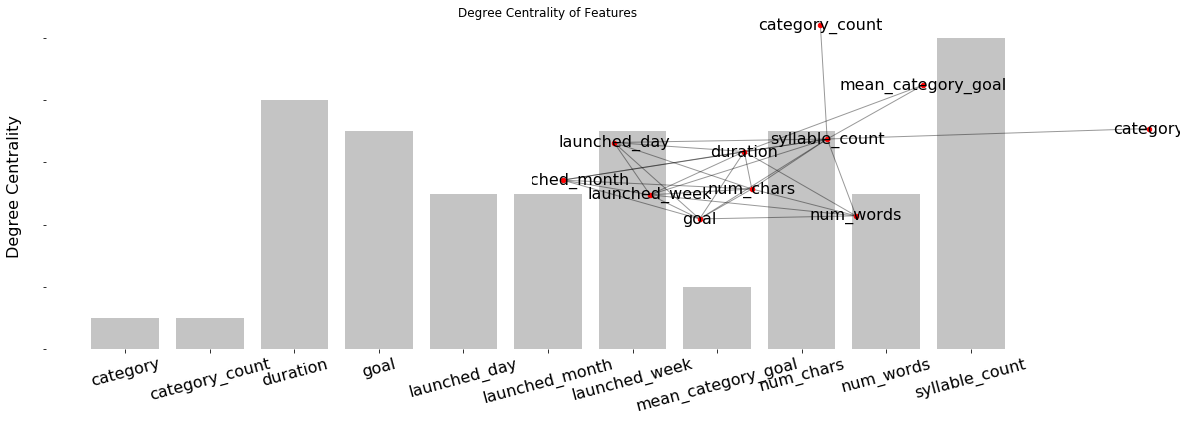

In [7]:
import itertools 
import networkx as nx 
G = nx.Graph()
for tree_in_forest in model1.estimators_:
    doc = {}
    for i,key in enumerate(X_test1.columns):
        doc[key] = tree_in_forest.feature_importances_[i]
    sorted_doc = sorted(doc.items(), key=lambda kv: kv[1], reverse = True)[:10]
    sorted_doc = [c for c in sorted_doc if c[0] != "diff_mean_category_goal"]
    for i, j in itertools.product(sorted_doc, sorted_doc):
        if i == j:
            continue
        if i[1] >= 0.08 or j[1] >= 0.08:
            if np.absolute(i[1] - j[1]) <= 0.05:
                G.add_edge(i[0], j[0])

k = dict(G.degree()).keys()
v = dict(G.degree()).values()

plt.figure(figsize=(18, 6))
ax = plt.subplot(111)
plt.bar(k, v, width=0.80, color='#c4c4c4')
plt.title("Degree Centrality of Features")
plt.ylabel("Degree Centrality", fontsize=16)
plt.xticks(rotation=15, fontsize=16)
plt.yticks(color="white")

ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')

def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()


labels = {}    
for node in G.nodes():
    labels[node] = node
        
plt.axes([0.5, 0.4, 0.5, 0.5])
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_color = "red", node_size=20)
nx.draw_networkx_labels(G, pos, labels, font_size=16, font_color='black')
nx.draw_networkx_edges(G, pos, alpha=0.4)
plt.show()

> From the above plot, we can identify that the maximum degree centrality nodes are - duration, syllable count, goal etc. From the network perspective, it means that if we remove these nodes from the network (high degree centrality nodes), this will lead to network disruption. This is similar to what we obtained in the relative feature importance plot. The key takeaway from this graph is that one can not afford to ignore these features while optimizing any crowdfunding project. 

<div id="5-2"></div>
<h2><font color="#5831bc" face="Comic Sans MS">5.2 Which features have the biggest impact on the project success? (Permutation Importance) </font>   </h2>   

In the last section, we mainly identified which the features at a very high level which are relatively important to the model outcome. In this section, we will go a little deeper and understand which features has the biggest impact on the model predictions (in absolute sense). One of the ways to identify such behaviour is to use permutation importance. 

The idea of permutation importance is very straightforward. After training a model, the model outcomes are obtained. The most important features for the model are the ones if the values of those feature are randomly shuffled then they lead to biggest drops in the model outcome accuracies. Let's look at the permutation importance of features of our model.

In [8]:
from eli5.sklearn import PermutationImportance
import eli5
perm = PermutationImportance(model1, random_state=1).fit(X_test, y_test)
pi_df = eli5.explain_weights_df(perm, feature_names = X_test.columns.tolist())
pi_df["color"] = pi_df["weight"].apply(lambda x : "green" if x > 0 else "red")

data = [
    go.Bar(
        orientation = "h",
        y = pi_df.feature[::-1],
        x = pi_df.weight[::-1],
        marker = dict(
            opacity = 0.5,
            color = pi_df.color[::-1]        ),
        error_x = dict( type='data', color="#9fa3a3",
            array=list(pi_df["std"][::-1]),
            visible=True),
        name = 'expenses'
    )
]


layout = go.Layout(title="Permutation Importance", height = 800, margin=dict(l=300))

annotations = []
for i, row in pi_df.iterrows():
    dict(y=row.feature, x=row.weight, text="d",
                                  font=dict(family='Arial', size=14,
                                  color='rgba(245, 246, 249, 1)'),
                                  showarrow=False,)
layout['annotations'] = annotations
fig = go.Figure(data=data, layout = layout)
iplot(fig, filename='base-bar')

**Inferences** 
> - This is an interesting plot, We can observe that the features shown in top and in green are the most important as if their values are randomized then the outcome performance suffers.   
> - We can observe that the top features are are the features which we mostly saw in the relative importance section, but using this graph we can quantify the amount of importance associated with them. And also obtain the ones which are least important, for example - launched week, if it was weekend or not etc.  

With this method, we obtained the importance of a feature in a more absolute sense rathar than a relative sense. Let's assume that our feature space forms a majority of the universe. Now, it will be interesting to plot both permutation and relative feature importances and make some key observations. 

In [9]:
imp_df = feature_importances.reset_index().rename(columns = {"index" : "feature"})
combined_df = imp_df.merge(pi_df, on="feature")

trace0 = go.Scatter(
    x = combined_df.importance,
    y = combined_df.weight,
    text = [v.title() if i < 16 else "" for i,v in enumerate(list(combined_df.feature)) ],
    mode='markers+text',
    textposition='top center',
    marker=dict(
        size = 10, color="red", opacity=0.5,
    ),
)

trace1 = go.Scatter(
    x=[0.034, 0.095],
    y=[0.008, 0.020],
    text=['Cluster of Features',
          'Highly Important Features'],
    mode='text',
)

data = [trace0]
layout = go.Layout(title = "Features : Relative Importance VS Permutation Importance", 
                   showlegend = False, yaxis=dict(title="Permutation Importance (Feature Weight)", showgrid=False),
                   xaxis=dict(title="Feature Importance (Relative)", showgrid=False))
#                       shapes = [{ 'type': 'circle', 'xref': 'x', 'yref': 'y',
#                                   'x0': 0.024, 'y0': 0.007, 'x1': 0.045, 'y1': 0.001,'opacity': 1.0,
#                                   'line': { 'color': 'rgba(50, 171, 96, 1)', 'dash': 'dot',}},
#                                { 'type': 'rect', 'x0': 0.065, 'y0': 0.019, 'x1': 0.12, 'y1': 0.0002,
#                                 'line': { 'color': 'rgba(128, 0, 128, 1)' , 'dash' : 'dot' }}])
fig = go.Figure(data = data, layout = layout)
iplot(fig, filename='bubblechart-size-ref')

**Inferences**  
> - Very Interesting Insights can be obtained from the above plot, There are some features which showed up higher in the relative feature importance, but when we look at their permuatation importance we see that they are not important. (Though, permutation importance results cannot be reproduced exactly because of randomness, but when I first plotted this plot I observed that launched week and month had high feature importance but lower permutation importance.)  
> - From this plot, we can again observe that our hypothesis is almost true, the project goal, duration, number of characters, number of words all are the most important features that one should look at while creating a new project page. 

### <font color="#5831bc" face="Comic Sans MS">Pressence of which keywords makes the biggest impact in the predictions?</font>  

Using permutation importance, we can also evaluate which keywords makes the biggest impact in the model prediction. Let's train another model which also uses keywords used in the project name and observe the permutation importance.

In [10]:
def clean_name(x):
    words = x.lower().split()
    cln = [wrd for wrd in words if not wrd[0].isdigit()]
    return " ".join(cln)
projects["cleaned_name"] = projects["name"].apply(lambda x : clean_name(x))

## add text features : top 100
vec = TfidfVectorizer(max_features=100, ngram_range=(1, 2), lowercase=True, stop_words="english", min_df=6)
X = vec.fit_transform(projects['cleaned_name'].values)

## append to original dataframe
vectors_df = pd.DataFrame(X.toarray(), columns=["_"+xx for xx in vec.get_feature_names()])
projects1_df = pd.concat([projects[features], vectors_df], axis=1)

## train the model
X_train, X_test, y_train, y_test = train_test_split(projects1_df, label, test_size = 0.25, random_state = 2)
X_train2, y_train2 = X_train[:15000], y_train[:15000]
X_test2, y_test2 = X_test[:1000], y_test[:1000]
model2 = RandomForestClassifier(random_state=1).fit(X_train2, y_train2)
y_pred = model2.predict(X_test2)

####### Interpretation 

from plotly import tools

perm = PermutationImportance(model2, random_state=1).fit(X_test2, y_test2)
pi_df = eli5.explain_weights_df(perm, feature_names = X_test2.columns.tolist(), feature_filter=lambda x: x[0] == '_')
pi_df["feature"] = pi_df["feature"].apply(lambda x : x[1:])
highs = pi_df[pi_df.weight >= 0.001]
med = pi_df[(pi_df.weight > -0.0005) & (pi_df.weight < 0.001)]
lows = pi_df[pi_df.weight <= -0.0005]

trace1 = go.Bar(
        orientation = "h",
        y = highs.feature[::-1],
        x = highs.weight[::-1],
        marker = dict(opacity = 0.4, color = "green" ), error_x = dict(type='data', color="#9fa3a3", array=list(highs["std"][::-1]), visible=True))
trace2 = go.Bar(
        orientation = "h",
        y = med.feature[:15][::-1],
        x = med.weight[:15][::-1],
        marker = dict(opacity = 0.4, color = "gray"), error_x = dict(type='data', color="#9fa3a3", array=list(med["std"][:15][::-1]), visible=True))
trace3 = go.Bar(
        orientation = "h",
        y = lows.feature,
        x = lows.weight,
        marker = dict(opacity = 0.4, color = "red"), error_x = dict(type='data', color="#9fa3a3", array=list(lows["std"][::-1]), visible=True))

ttls = ["Positive Impact","", "Moderate + or - Impact" ,"", "Negative Impact"]
fig = tools.make_subplots(rows=1, cols=5, print_grid=False, subplot_titles = ttls)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 3)
fig.append_trace(trace3, 1, 5)

fig['layout'].update(showlegend=False, title='Impact of Words Used in Project Name - Permutation Importance')
iplot(fig, filename='simple-subplot-with-annotations')

**Inferences**
> - From the first plot, we can observe that there are a certain keywords which when used in the project name are likely to increase the probability success of a project. Example -  "project", "film", and "community". While on the other hand, keywords like "game", "love", "fashion" are likely to garner less attraction. This implies that crowdfunding projects related to games or entertainment such as love or fashion may not be very successful as compared to the ones related to art, design etc. 

**Note -** It is possible to get different results when run again, thus it is recommended to use this approach on a much bigger dataset. But ofcourse, its not a very big problem, atleast it gives an understanding about the words to focus on. 

<div id="5-3"></div>
<h2><font color="#5831bc" face="Comic Sans MS">5.3 How does changes in features lead to changes in model outcome? (**Partial Dependencies**)  </font>   </h2>  

<br>So far we have only talked about which features are most or least important from a pool of many features. For example, we observed that Project Goal, Project Duration, Number of Characters used etc are some of the important features related to project success. In this section, we will look at what are the specific values or ranges of features which leads to project success or failure. Specifically, we will observe that how making changes such as increasing or decreasing the values affect the model outcomes. These effects can be obtained by plotting the partial dependency plots of different features. 

### <font color="#5831bc" face="Comic Sans MS">Project Name - Features</font>  

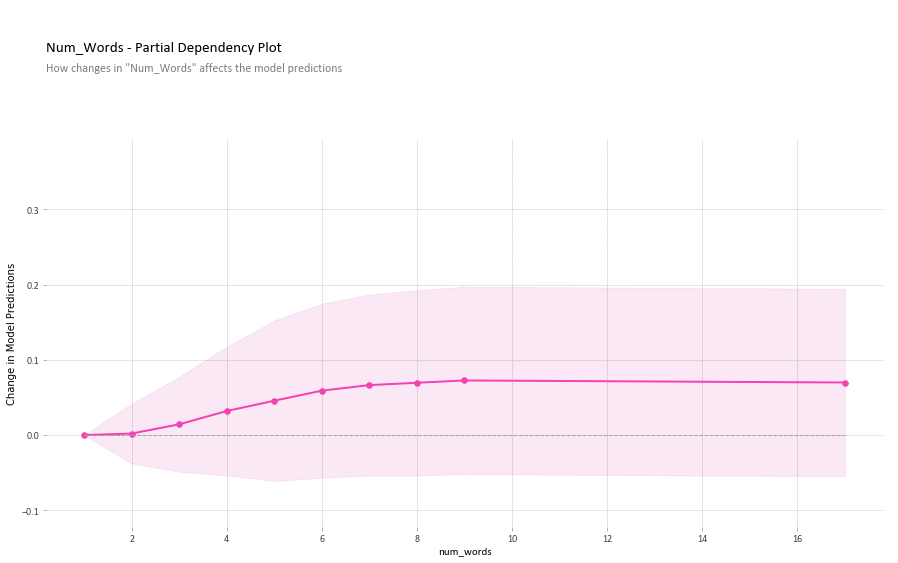

In [11]:
def _plot_pdp(feature, pdp_color, fill_color):
    plot_params = {
        'title': feature.title() + ' - Partial Dependency Plot',
        'title_fontsize': 15,
        'subtitle': 'How changes in "%s" affects the model predictions' % feature.title(),
        'subtitle_fontsize': 12,
        'font_family': 'Calibri',
        'xticks_rotation': 0,
        'line_cmap': 'cool',
        'zero_color': '#a2a5a0',
        'zero_linewidth': 1.0,
        'pdp_linewidth': 2.0,
        'fill_alpha': 0.25,
        'markersize': 5.5,
        'pdp_hl_color': 'green',
        'pdp_color': pdp_color,
        'fill_color': fill_color,

    }
    pdp_goals = pdp.pdp_isolate(model=model1, dataset=X_test1, model_features=X_test1.columns, feature=feature)
    pdp.pdp_plot(pdp_goals, feature, plot_params = plot_params)
    plt.ylabel("Change in Model Predictions");
    plt.show();
    
cols_of_interest = ['num_words', 'num_chars', 'syllable_count',
                    'duration', 'launched_month', 'launched_day',
                    'category_count', 'main_category_count']

_plot_pdp(cols_of_interest[0], "#f442b3", "#efaad6")

> We observe that the projects having fewer number of words (<= 3) in the name does not show any improvement in model success. However, if one start increasing the number of words in the project name, the corresponding model improvement also increases linearly. For all the projects having more than 10 words in the name, the model becomes saturate and shows similar predictions. Hence, the ideal word limit is somewhere around 7 - 10.  


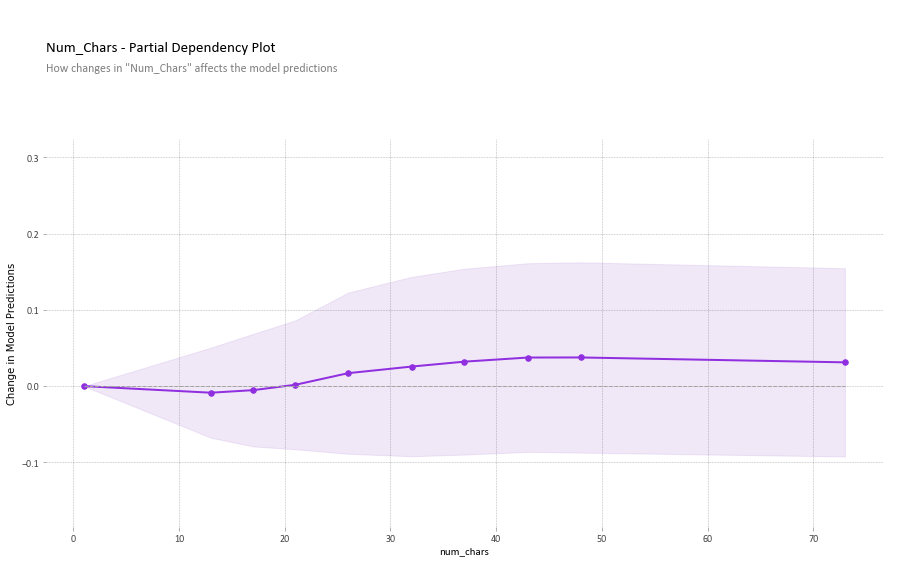

In [12]:
_plot_pdp(cols_of_interest[1], "#902fe0", "#c4a1e0")

> From the 2nd plot, we observe that if the total number of characters are less than 20, then model performance decreases than a normal value. Increasing the characters in the name linearly also increases the model performances.  


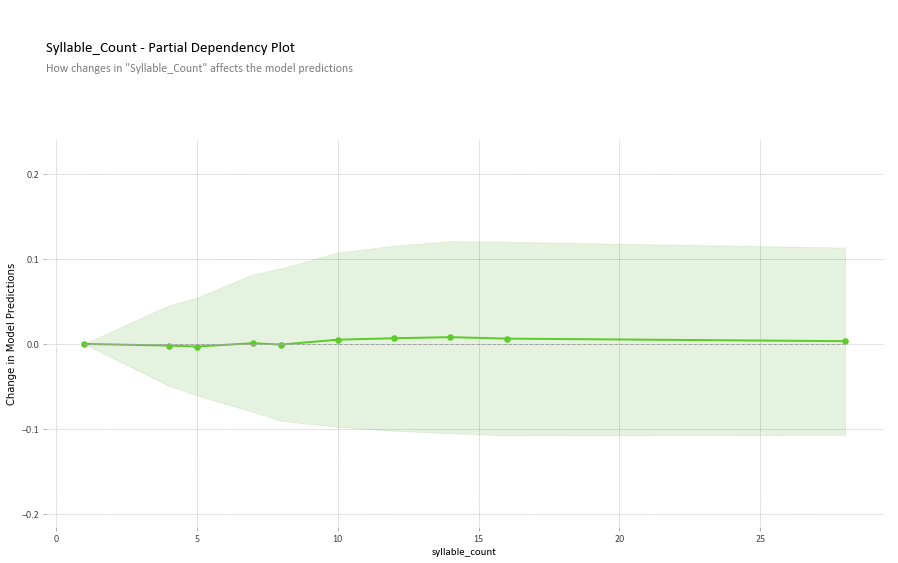

In [13]:
_plot_pdp(cols_of_interest[2], "#5dcc2a", "#9dce86")

> Change in Syllables does not show significant differences in model improvements. 

Let's also plot the interaction between number of words and characters used. 

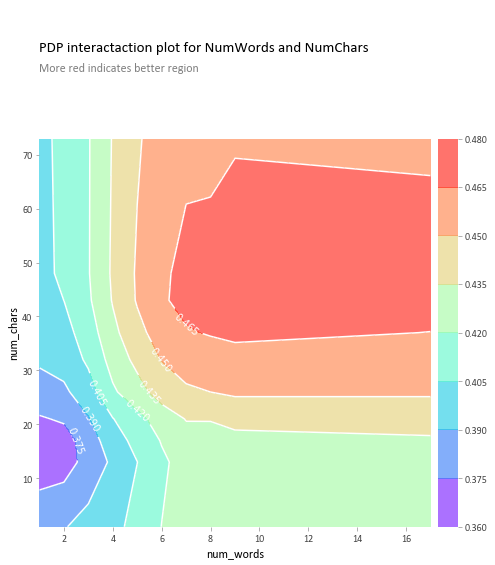

In [14]:
features_to_plot = ['num_words', 'num_chars']
inter1 = pdp.pdp_interact(model1, X_test1, X_test1.columns, features_to_plot)

plot_params = {
    'title': 'PDP interactaction plot for NumWords and NumChars',
    'subtitle': 'More red indicates better region',
    'title_fontsize': 15,
    'subtitle_fontsize': 12,
    'contour_color':  'white',
    'font_family': 'Calibri',
    'cmap': 'rainbow',
    'inter_fill_alpha': 0.6,
    'inter_fontsize': 9,
}

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour', plot_params = plot_params)
plt.show()

> From the above plot, it can be observed that about 40 - 65 characters and 10 - 14 words are the good numbers for the project name. 

### <font color="#5831bc" face="Comic Sans MS">Project Launched Day and Duration</font>   

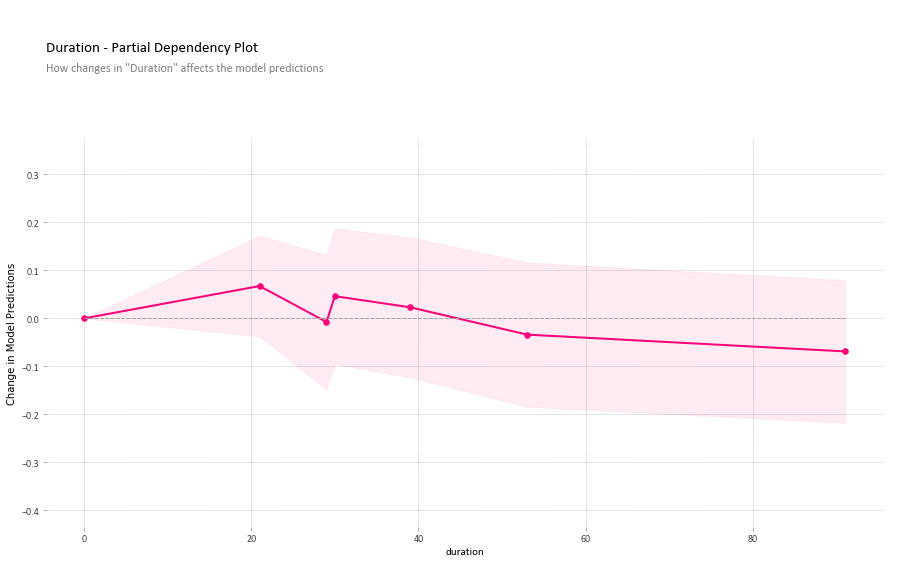

In [15]:
_plot_pdp(cols_of_interest[3], "#ff0077", "#fcb3d5")

> For shorter project duration (less than 20 days), the chances that project will be successful are higher. However if the duration of a project is increased to say 60-90 days, it is less likely to acheive its goal. 

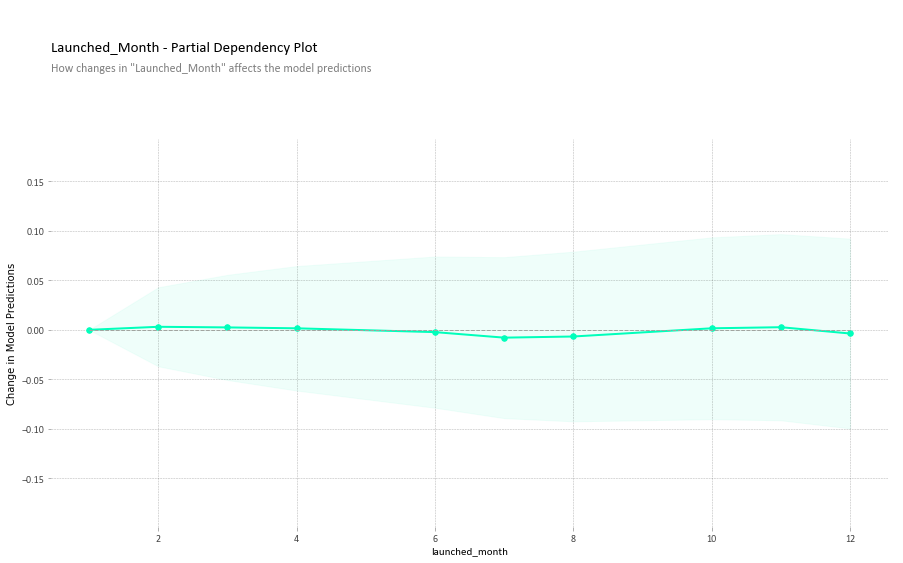

In [16]:
_plot_pdp(cols_of_interest[4], "#00ffbb", "#c2fcec")

> - We understood from the permutation importance that launched month has the less impact, which we can observe from partial dependency plots. But I just wanted to see are there any specific months in which the chances of project success are more. Looks like that towards the last quarter of the year (months 9 - 12), the success rate of projects is slightly higher while it is slightly lesser in quarter 3. 

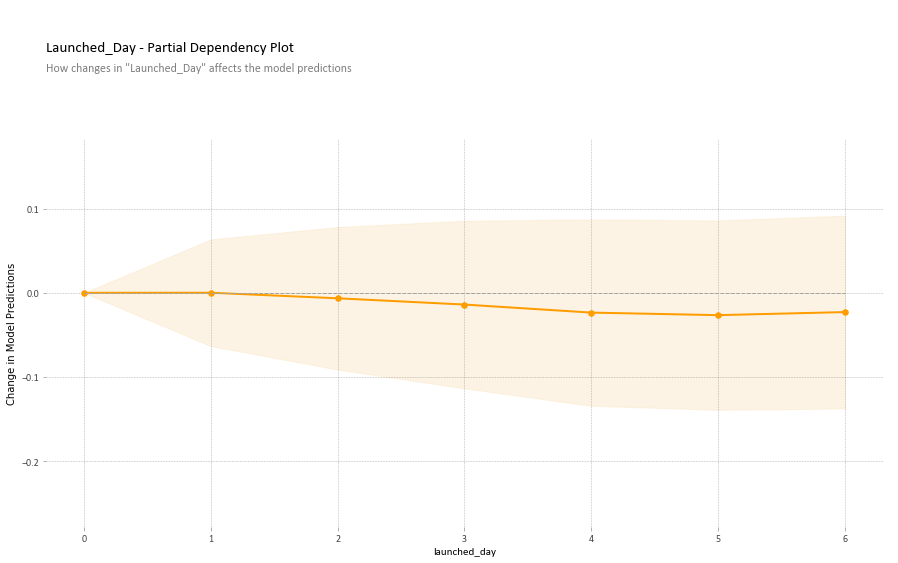

In [17]:
_plot_pdp(cols_of_interest[5], "#ff9d00", "#f7d399")

> For launch day, the model performance is lesser when launched day is friday - sunday as compared to monday - wednesdays. 

### <font color="#5831bc" face="Comic Sans MS">Project Main Category </font>  

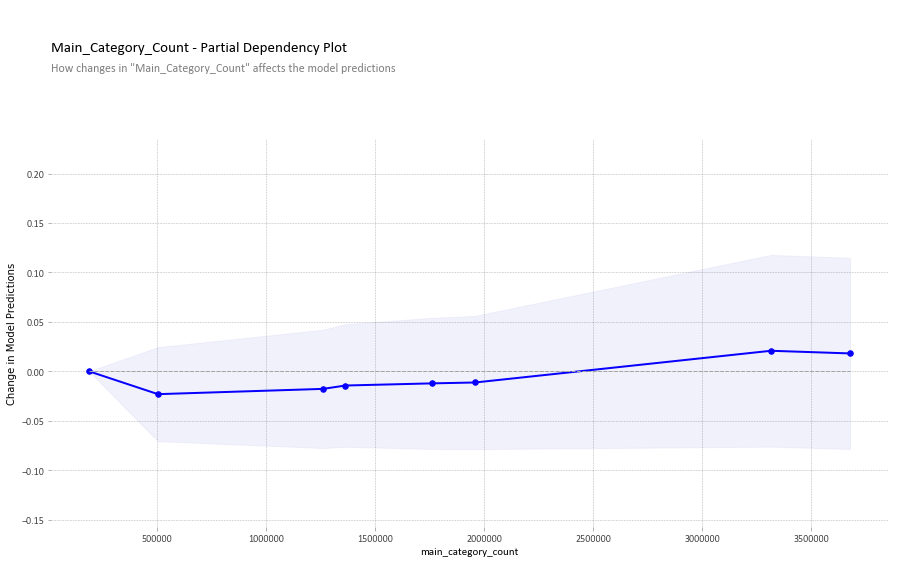

In [18]:
_plot_pdp(cols_of_interest[7], "#0800ff", "#cac9f2")

> From the feature definition, category count is a feature which act as the proxy of popularity of a project category. For example, if in Travel category a large number of projects are posted then its category_count will be higher so it is a popular category on Kickstarter. On the other hand, if in the Entertainment category, very rarely someone adds a project, its category_count will be lesser and so is its popularity. From the plot, we can observe that chances that a project will be successful will be higher if it belongs to a popular category. Also holds true for main category. 

### <font color="#5831bc" face="Comic Sans MS">How about specific categories ?</font>   

By ploting the pdp_isolate graph we can also identify the effect of specific project categories. 

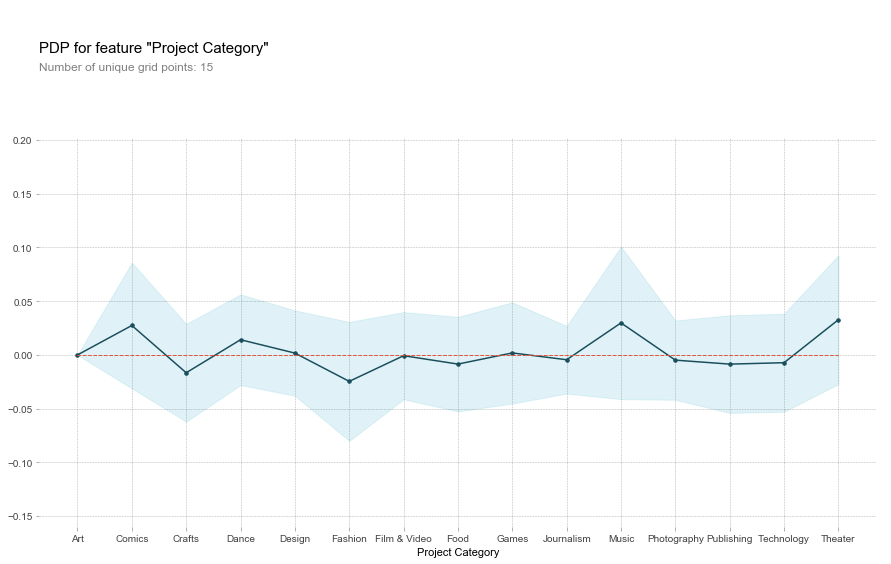

In [19]:
pdp_category = pdp.pdp_isolate(model=model1, dataset=X_test1, model_features=X_test1.columns,
                             feature=['Art', 'Comics', 'Crafts', 'Dance', 'Design', 'Fashion', 'Film & Video', 
                                      'Food', 'Games', 'Journalism', 'Music', 'Photography', 'Publishing', 'Technology', 'Theater'])
fig, axes = pdp.pdp_plot(pdp_isolate_out = pdp_category, feature_name='Project Category', 
                         center=True, plot_lines=False, frac_to_plot=100, plot_pts_dist=False)

From the partial dependency plot for project category, we observe that the accuracy of model predicting the project success increases if it belongs to "Music", "Comics",  "Theater", or "Dance" categories.  It decreases if it belongs to "Crafts", "Fashion Film & Video". The same insights can be backed from the **actual predictions plot**.

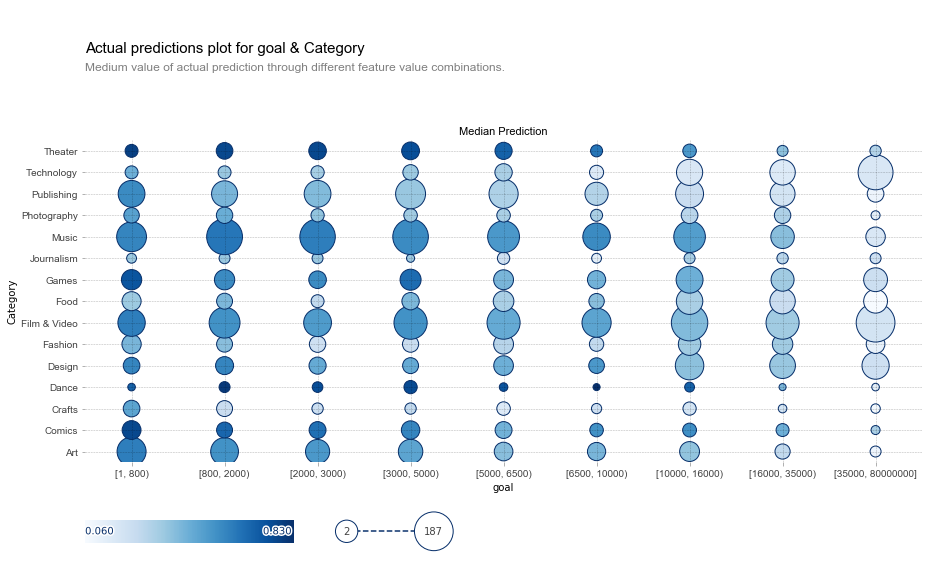

In [20]:
fig, axes, summary_df = info_plots.actual_plot_interact(
    model=model1, X=X_test1,
    features=['goal', ['Art', 'Comics', 'Crafts', 'Dance',
       'Design', 'Fashion', 'Film & Video', 'Food', 'Games', 'Journalism',
       'Music', 'Photography', 'Publishing', 'Technology', 'Theater']],
    feature_names=['goal', 'Category'])

<div id="5-4"></div>
## <font color="#5831bc" face="Comic Sans MS">5.4 Understanding the decisions made by the Model (using SHAP) </font>  

<br>In this section, We make the final predictions from our model and interpret them. For this purpose we will use of SHAP values which are the average of marginal contributions of individual feature values across all possible coalitions. **Let's try to understand this in laymen terms**, Consider a random project from the dataset with following features:

* Title contains 8 words  
* Title contains "machine learning"   
* Project goal is US 10000 dollars   
* Project is launched on a weekday   

The trained model predicts that this project is likely to be successful with a probability of 75%. But, someone asks the question: **Why this project has the success probability of 75% not the 95% ?** To answer this question, we obtain the shap values for the prediction made by the model for this project. Shap values indicate the amount of increase or decrease in model outcome value from the average value of the predictions in the entire dataset. For example: 

* The average prediction value for this project would have been 45% without any model. 
* Due to the presence of 8 keywords in the project title the success probability is increased to 60%.  
* Since, the title contains the bigram "machine learning", the success probability is further increased to 88%.   
* Since the project is launched on a weekday, the success probability is increased by 2% to 90%  
* However, since the project goal is too high (as compared to the average of the universe), the success probability is decreased from 90% to 75%.  

Let's see the model predictions on the entire dataset. 

In [21]:
preds = model1.predict(X_test1)
dict(Counter(preds))

{0: 4236, 1: 2298}

In a sample of around 6500 crowdfunding projects, Model predicts that about 4200 will be failed and only about 2300 will be successful. Now, we are interested to understand what is driving the success and failure of these projects.  Let's plot the individual feature effects on some of these predictions to make sense out of them. 

In [22]:
import shap 
shap.initjs()
data_for_prediction = X_test.iloc[1]
explainer = shap.TreeExplainer(model1)
shap_values = explainer.shap_values(data_for_prediction)
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction, plot_cmap=["#f04e4e","#6677f9"])

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

C extension was not built during install!


ImportError: numpy.core.multiarray failed to import

> For this particular project, the prediction value is increased to 0.58 from the base value of 0.4178. This implies that presense of certain featuers and their corresponding values in this project makes it more likely to be successful. For instance, duration is 44, number of characters in project name are 27, and the difference in goal amount from the mean goal amount of the category is about 50K. These features increases the probability. 

In [ ]:
shap.initjs()
data_for_prediction = X_test.iloc[2]
explainer = shap.TreeExplainer(model1)
shap_values = explainer.shap_values(data_for_prediction)
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction, plot_cmap=["#f2654f","#7d4ff1"])

> For this particular project, apart from number of characters, duration, the goal amount = 2000 also increases the probability from the base value of 0.4178 to 0.72. Not many features decreases the proabbility significantly. 

In [ ]:
shap.initjs()
data_for_prediction = X_test.iloc[3]
explainer = shap.TreeExplainer(model1)
shap_values = explainer.shap_values(data_for_prediction)
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction, plot_cmap=["#f79d2e","#6677f9"])

> For this project, the probability is not increased much as compared to other projects. Infact the probability is decreased due to the number of characters equal to 17, a high value of goal, and the duration of 29 days. 

In [ ]:
shap.initjs()
data_for_prediction = X_test.iloc[7]
explainer = shap.TreeExplainer(model1)
shap_values = explainer.shap_values(data_for_prediction)
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction, plot_cmap=["#f04e4e","#6677f9"])

> For this project, duration of 25, small goal of 1500 significantly increases the project chances. However, less number of words (only 4), and difference from mean category goal amounts decreases the probability almost equally. 

In [ ]:
shap.initjs()
data_for_prediction = X_test.iloc[10]
explainer = shap.TreeExplainer(model1)
shap_values = explainer.shap_values(data_for_prediction)
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction, plot_cmap=["#f79d2e","#812df7"])

> For this project, a large duration, presence of a particular category decreases the chances significantly. Not many features and the feature values are able to increase the project success chances. 

Now, we can aggreate the shap values for every feature for every prediction made by the model. This helps to understand an overall aggregated effect of the model features. Let's plt the summary plot. 

In [ ]:
X_test_s = X_test.head(1000)
shap_values = explainer.shap_values(X_test_s)
shap.summary_plot(shap_values[1], X_test_s)

> We can observe that shap values is higher for the same set of features which we saw in relative feature importance and permutation importance. This confirms that features which greatly influence the project success are related to project features such as duration or goal. 

<div id="6"></div>
## <font color="#5831bc" face="Comic Sans MS">6. Final Conclusions</font>  

After applying these different techniques we understood that there are certain factors which increases or decreases the chances of a project successfully able to raise the funds. Both from project owner's and the company's perspective it is important to set the optimal values of project goal and the duration. A large duration or a very large amount may not be able completely successful. At the same time it is important to choose right number of words and characters in the name of the project. For example, a project having very few or very large number of words and characters may become less intutive and less self explanatory. Similarly, the project category also plays a crutial role, There will be some categories on the platform in which total number of projects are very large, these are so called popular categories. The chances may be higher if the project is posted in a popular category rather than a rare category. 

In this kernel, I shared a general framework which I follow while solving any data science or analytics problem. This framework can be applied to many other different use-cases as well. The main focus of this kernel was different techniques related to machine learning explanability. Mainly, I used relative feature importance, permutation importance, partial dependecies, and shap values. In my opinion, here are some pros and cons of these techniques. Apart from these techniques, there are other alternatives as well (such as skater, lime). 

<table>
    <tr><td>Technique</td> <td>Pros</td> <td>Cons</td></tr>
    <tr><td>Feature Importance</td> <td>1. Available in almost all tree based models </td> <td>1. Does not gives the absolute ranking rather a relative ranking, hence it changes significantly with more number of features <br> 2. More accurate inferences requires more data, more iterations, more decision trees</td></tr>
    <tr><td>Permutation Importance</td> <td>1. Easier, Fast to implement <br> 2. Does not require to train the model again and again </td> <td>1. Randomization of results <br> 2. Results on training can differ from that on test <br> 3. It only gives a single feature importance, but it is possible that a feature is not independent rather is important due to the presence of some other features. <br> 4. Requires a good amount of data to obtain good final values </td></tr>
    <tr><td>Partial Dependencies</td> <td>1. Easier, faster to implement. <br> 2. Understanding of plots is simple yet powerful</td> <td>1. Very difficult to obtain the partial dependencies for more than 2 (or 3) features. </td></tr>
    <tr><td>SHAP Values</td> <td>1. Backed by an excellent theory which provides a reasonable foundation</td> <td>1. Very slow to compute the aggregated effects <br> 2. It does not provide an exact solution rathar an approximate solution <br> 3. Somewhat difficult to interpret</td></tr>
   </table>

## References 
* https://www.kaggle.com/learn/machine-learning-explainability  
* https://aiukraine.com/wp-content/uploads/2018/08/10_55-Kolbasin-Vladimir-How-to-explain-your-network_v2.pdf  
* https://github.com/lopusz/awesome-interpretable-machine-learning  
* https://christophm.github.io/interpretable-ml-book/index.html  
* https://towardsdatascience.com/interpretable-machine-learning-with-xgboost-9ec80d148d27   
* https://www.kaggle.com/cast42/lightgbm-model-explained-by-shap   
* http://savvastjortjoglou.com/intrepretable-machine-learning-nfl-combine.html  
* https://www.youtube.com/watch?v=s-yT5Is1G1A    
* https://www.youtube.com/watch?v=vUqC8UPw9SU  
* https://shirinsplayground.netlify.com/2018/07/explaining_ml_models_code_caret_iml/  

Thanks for reading this notebook, if you liked it please upvote it and share the feedback. 